In [1]:
import tensorflow as tf
from configuration import *
import io_utils

In [2]:
def extract_dataset_colors(dataset_path):
    dataset = tf.keras.utils.image_dataset_from_directory(
        dataset_path,
        labels=None,
        color_mode="rgba",
        batch_size=None,
        image_size=(IMG_SIZE, IMG_SIZE)
    )

    empty_image = tf.zeros([IMG_SIZE, IMG_SIZE, INPUT_CHANNELS])
    image_of_whole_dataset = dataset.reduce(empty_image, lambda acc, image: tf.concat([acc, image], axis=0))

    palette = io_utils.extract_palette(image_of_whole_dataset, INPUT_CHANNELS, None)
    return palette

In [ ]:
for folder in DATA_FOLDERS:
    palette = extract_dataset_colors(folder)
    print("Palette for ", folder, ": ", tf.shape(palette))

Found 7296 files belonging to 1 classes.


## Estudando o histograma

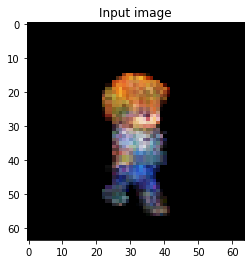

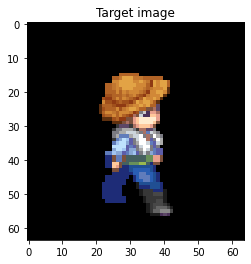

tf.shape(input_image) tf.Tensor([ 1 64 64  3], shape=(4,), dtype=int32)
tf.shape(target_image) tf.Tensor([ 1 64 64  3], shape=(4,), dtype=int32)


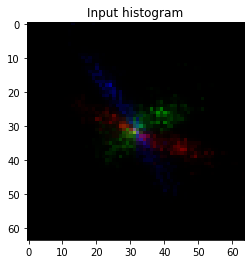

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


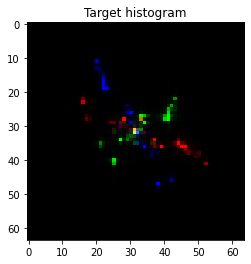

Hellinger loss tf.Tensor(0.52977544, shape=(), dtype=float32)
L1 loss tf.Tensor(1.180052, shape=(), dtype=float32)
L2 loss tf.Tensor(0.010777012, shape=(), dtype=float32)
L1 loss tf.Tensor(1.180052, shape=(), dtype=float32)
L2 loss tf.Tensor(0.010777012, shape=(), dtype=float32)
old l1 tf.Tensor(0.0491862, shape=(), dtype=float32)
input shae tf.Tensor([ 1 64 64  3], shape=(4,), dtype=int32)
tf.abs(input_image - target_image).shape (1, 64, 64, 3)
tf.reduce_sum(tf.abs(input_image - target_image), axis=[1,2,3]) tf.Tensor([604.4], shape=(1,), dtype=float32)
new l1 tf.Tensor(604.4, shape=(), dtype=float32)


8.770355e-07

In [7]:
import tensorflow as tf
from histogram import calculate_rgbuv_histogram as calc, histogram_hellinger_loss as hloss, histogram_l1_loss as l1_loss, histogram_l2_loss as l2_loss
from matplotlib import pyplot as plt

def load_image(path):
    image = tf.keras.utils.load_img(path, color_mode="rgb")
    image = tf.cast(image, "float32")
    image = image / 127.5 - 1.
    image = image[tf.newaxis, ...]
    return image

def show_image(image, title=None):
    image = tf.squeeze(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


input_image = load_image("docs/temp-generated-1-64x64.png")
target_image = load_image("docs/temp-target-1-64x64.png")

show_image(input_image * 0.5 + 0.5, "Input image")
show_image(target_image * 0.5 + 0.5, "Target image")

print("tf.shape(input_image)", tf.shape(input_image))
print("tf.shape(target_image)", tf.shape(target_image))

input_histogram = calc(input_image)
target_histogram = calc(target_image)

plt.ion()
plt.figure()
show_image(input_histogram * 100, "Input histogram")
show_image(target_histogram * 100, "Target histogram")

hellinger_los = hloss(input_histogram, target_histogram)
l1 = tf.reduce_mean(tf.reduce_sum(tf.abs(target_histogram - input_histogram), axis=[1, 2, 3]))
l2 = tf.reduce_mean(tf.reduce_sum(tf.pow(target_histogram - input_histogram, 2.), axis=[1, 2, 3]))
print("Hellinger loss", hellinger_los)
print("L1 loss", l1)
print("L2 loss", l2)
print("L1 loss", l1_loss(target_histogram, input_histogram))
print("L2 loss", l2_loss(target_histogram, input_histogram))

print("old l1", tf.reduce_mean(tf.abs(input_image - target_image)))
print("input shae", tf.shape(input_image))
print("tf.abs(input_image - target_image).shape", tf.abs(input_image - target_image).shape)
print("tf.reduce_sum(tf.abs(input_image - target_image), axis=[1,2,3])", tf.reduce_sum(tf.abs(input_image - target_image), axis=[1,2,3]))
print("new l1", tf.reduce_mean(tf.reduce_sum(tf.abs(input_image - target_image), axis=[1,2,3])))


mae = tf.keras.losses.MeanSquaredError()
mae(target_histogram, input_histogram).numpy()

In [9]:
batch = tf.constant([
    [
        [[1, 2, 3], [4, 5, 6]],
        [[-5,-4,-3], [-2,-1,0]],
    ],
    [
        [[6, 7, 8], [5, 4, 3]],
        [[0, 1, 2], [-1,0,-1]]
    ]
])
print(batch.shape)

tf.reduce_mean(tf.reduce_sum(batch, axis=[1, 2, 3]))


(2, 2, 2, 3)


<tf.Tensor: shape=(), dtype=int32, numpy=20>